<h1 style="font-size:3rem;color:#6667AB;">TP 4</h1>

## Méthodes de Simulation Informatique
### Amaya Nogales Gómez

<h2> Apprentissage supervisé </h2> 


<h2> Partie 1: Machines a Vecteurs de Support.</h2>

In [1]:
#we import all the required libraries
import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal # for generating synthetic data 
from sklearn.svm import SVC
from sklearn import datasets #For real datasets
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)

In [2]:
def generate_synthetic_data():

    """
        Code for generating the synthetic data.
        We will have two non-sensitive features and one sensitive feature.
        A sensitive feature value of 0.0 means the example is considered to be in protected group (e.g., female) and 1.0 means it's in non-protected group (e.g., male).
    """

    n_samples = 10 # generate these many data points per class
    
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y

    """ Generate the features randomly """
    #For the NON-protected group (men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[10, 1], [1, 3]]
    nv1, X1, y1= gen_gaussian(int(n_samples), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples),mu2, sigma2, 0) # negative class
    
    

    

    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    

    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    

    return X,y

In [3]:
X_syn, y_syn = generate_synthetic_data() 

In [4]:
print(X_syn)
print(y_syn)

[[-1.75227743  0.46427581]
 [-3.06017164 -5.33162345]
 [ 6.37824414 -2.20331545]
 [ 0.75082049  0.15112142]
 [ 2.52389828  4.28677199]
 [ 1.45650009  1.73493218]
 [ 4.19572104  4.33668307]
 [-0.34200841  0.57161057]
 [ 3.72522189  0.24478133]
 [-3.13177091  0.80921212]
 [ 2.17757635 -2.0595154 ]
 [ 3.13943753  4.42023136]
 [ 1.17846162 -2.0563402 ]
 [-5.15509615 -2.3786229 ]
 [-2.82893845 -3.29513223]
 [ 3.34152678  4.50415125]
 [-3.85571356 -0.78087953]
 [ 0.99760408  1.76102429]
 [-0.84763091 -1.20541586]
 [-1.37993071 -4.70398534]]
[0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0]


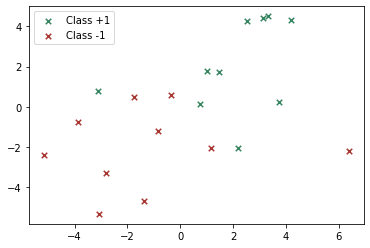

In [5]:
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")


plt.legend(loc=2, fontsize=10)

plt.show()

In [6]:
#Fonction exemple pour dessiner une base de donnees et un hyperplane separateur

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

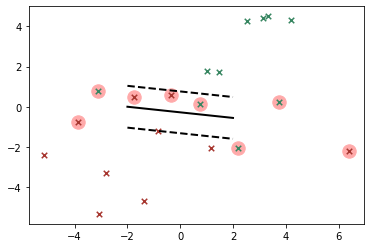

In [7]:
#SVM Classifier model
#le parametre C controle les violations du marge
#un C plus petit entraîne plus de violations de marge mais une marge plus large

svm_clf = SVC(kernel="linear", C=float("4.0"))
svm_clf.fit(X_syn, y_syn)

plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")


plt.show() 

1- Changez les parametres de la fonction <i> plot_svc_decision_boundary </i> de tel facon que l'hyperplane soit bien dessine (xmin et xmax).

2- Calculez la precision, sensibilite et specificite.

3- Changez le valeur du parametre C, mettez-lui egal a 0.4. Quel changements vous observez?
4- Recalculez la precision, sensibilite et specificite pour cette nouvelle hyperplane.

5- Exercise du tableau au papier.

6- Maintenant, calculer avec l'aide du sklearn l'hyperplane SVM pour la base de donnees de l'exercise 5.

7- Calculez la precision, sensibilite et specificite.


8- Importez la base de données COMPAS utilisé dans l'analyse Propublica "propublica.csv". Binarisez les variables <i>c_charge</i>, <i>race</i>, <i>age_cat</i> et <i>sex</i>.

9- Creez une nouvelle dataframe qu'avec les variables suivants:
['age', 'priors_count', 'days_b_screening_arrest',
         'juv_fel_count',
       'juv_misd_count', 'juv_other_count', 'is_violent_recid', 'c_charge',
        'less_than_25', 'between_25_45', 'greater_than_25',
        'Male']
        
10- Notre colonne d'etiquettes c'est <i>two_year_recid</i>. Tenant en compte ca. Calculez l'hyperplane du SVM, la precision, sensibilite et specificite.

11- Creez une nouvelle serie (colonne du dataframe) avec les preditions du COMPAS, appelez-la <i>COMPAS_decision</i>. COMPAS_decision=0 si score_text= Low et 1 au cas contraire.

12- Calculez de nouveaux les 3 metriques pour cette nouvelle prediction et les vrais etiquettes.

13- Quelle algorithme obtient des meilleurs resultats: le SVM ou le COMPAS?


14- Calculez et dessinez le SVM pour la base de donnees du TP2, Type B, exercise 1. Calculez les metriques de performance.

15- Calculez et dessinez le SVM pour la base de donnees du TP2, Type B, exercise 2, c'est-a-dire, avec les donnees aberrantes inclus. Calculez les metriques de performance. 

16- Quels differences vous observez? "Jouez" avec le parametre C pour obtenir differents hyperplans. Qu'est-ce vous observez?



## Iris dataset 

In [8]:
iris = datasets.load_iris()
print(iris.data.shape)
print(iris.feature_names) #variables, features
print(iris.target_names) #classes

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


17- Quelle est la taille de ce base de donnees? Et la dimension? Combient de classes il y a?

On va changer la base de donnes de facon qu'on soit en dimension 2 et qu'avec 2 classes.

In [9]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
#print(X)

y = iris["target"]


setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(y.size)


100


18- Calculez et dessinez le classificateur SVM pour cette base de donnees. Calculez les metriques.

19- A l'aide des fonctions <i>.xlabel</i>, <i>.ylabel</i>, <i>.title</i> et <i>.axis</i> modifiez la figure en creant des titres et etiquettes pour les axes.

EXTRA:

1- Faire les exercises 14 et 15 mais pour le Type A ET en dimension 2.

2- Importez une base de donnees de kaggle.com (pour classification binaire, calculez le SVM et les metriques.

3- Importez une base de donnees de la UCI (pour classification binaire, calculez le SVM et les metriques. 

